In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os, glob
import pandas as pd
from torch.utils.data import Dataset, random_split, DataLoader

In [2]:
pip install opendatasets --upgrade

In [3]:
#username":"gamzearmaan","key":"f949707dadc9c3f5788256592e724f7b
import opendatasets as od
dataset_url = 'https://www.kaggle.com/jessicali9530/coil100'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gamzearmagan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jessicali9530/coil100


100%|██████████| 127M/127M [00:01<00:00, 111MB/s] 


In [4]:
data_direct = './coil100/coil-100/coil-100'
file_list = glob.glob(f'{data_direct}/*.png')

labels = [(f.split('/')[-1], int(f.split('/')[-1].split('__')[0].split('obj')[1]))   for f in file_list]


In [5]:
#checking
file_list


['./coil100/coil-100/coil-100/obj44__95.png',
 './coil100/coil-100/coil-100/obj55__70.png',
 './coil100/coil-100/coil-100/obj5__160.png',
 './coil100/coil-100/coil-100/obj80__245.png',
 './coil100/coil-100/coil-100/obj19__325.png',
 './coil100/coil-100/coil-100/obj37__65.png',
 './coil100/coil-100/coil-100/obj70__140.png',
 './coil100/coil-100/coil-100/obj13__30.png',
 './coil100/coil-100/coil-100/obj2__280.png',
 './coil100/coil-100/coil-100/obj35__150.png',
 './coil100/coil-100/coil-100/obj64__255.png',
 './coil100/coil-100/coil-100/obj79__350.png',
 './coil100/coil-100/coil-100/obj60__230.png',
 './coil100/coil-100/coil-100/obj30__120.png',
 './coil100/coil-100/coil-100/obj8__95.png',
 './coil100/coil-100/coil-100/obj73__205.png',
 './coil100/coil-100/coil-100/obj15__285.png',
 './coil100/coil-100/coil-100/obj69__60.png',
 './coil100/coil-100/coil-100/obj34__250.png',
 './coil100/coil-100/coil-100/obj8__25.png',
 './coil100/coil-100/coil-100/obj51__315.png',
 './coil100/coil-100/coi

In [6]:
from PIL import Image, ImageStat


#preparing data set
class Coil100_DataSet(Dataset):
  def __init__(self,label_list, root,transform=None):
    self.data_frame =label_list
    self.transform =transform
    self.root_dir =root


  def __len__(self):
    return len(self.data_frame)

  def __getitem__(self, index):
    row = self.data_frame[index]
    image_id, image_label = row[0], row[1] -1
    image_name = self.root_dir + "/" + str(image_id)
    img= Image.open(image_name)
    if self.transform:
      img = self.transform(img)
    return img, image_label





In [7]:
import torchvision.transforms as transforms

dataset = Coil100_DataSet(labels, data_direct, transform=transforms.ToTensor())
len(dataset)

7200

In [8]:
#checking
img, label = dataset[42]
print(img.shape, label)
img

torch.Size([3, 128, 128]) 69


tensor([[[0.2078, 0.2078, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
         [0.1098, 0.1098, 0.0980,  ..., 0.1059, 0.1020, 0.1059],
         [0.0980, 0.1176, 0.1020,  ..., 0.1098, 0.1176, 0.1098],
         ...,
         [0.1176, 0.1176, 0.0980,  ..., 0.1176, 0.1176, 0.1098],
         [0.1059, 0.1216, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
         [0.1098, 0.1098, 0.1098,  ..., 0.1098, 0.1098, 0.1098]],

        [[0.2000, 0.2000, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
         [0.1098, 0.1098, 0.1098,  ..., 0.1059, 0.1059, 0.1216],
         [0.1098, 0.1255, 0.1098,  ..., 0.1098, 0.1216, 0.1176],
         ...,
         [0.1176, 0.1255, 0.1020,  ..., 0.1216, 0.1216, 0.1176],
         [0.1059, 0.1216, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
         [0.1098, 0.1098, 0.1098,  ..., 0.1098, 0.1098, 0.1098]],

        [[0.1255, 0.0392, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
         [0.1098, 0.1098, 0.1020,  ..., 0.1216, 0.1098, 0.1294],
         [0.1216, 0.1333, 0.1059,  ..., 0.1098, 0.1098, 0.

In [9]:
random_seed =42
torch.manual_seed(random_seed)

In [10]:
input_channel =3 #rgb image
input_size= 3*128 *128
num_class=101

In [11]:
batch_size =100
val_size=720
test_size=720
train_size=5760

train_data, val_data, test_data =random_split(dataset,[train_size, val_size, test_size])
print(f"size of train data : {len(train_data)}")
print(f"size of train data : {len(val_data)}")

size of train data : 5760
size of train data : 720


In [12]:
train_data_load =DataLoader(train_data, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_data_load =DataLoader(val_data, batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_data_load =DataLoader(test_data, batch_size, shuffle=True, num_workers=2, pin_memory=True)

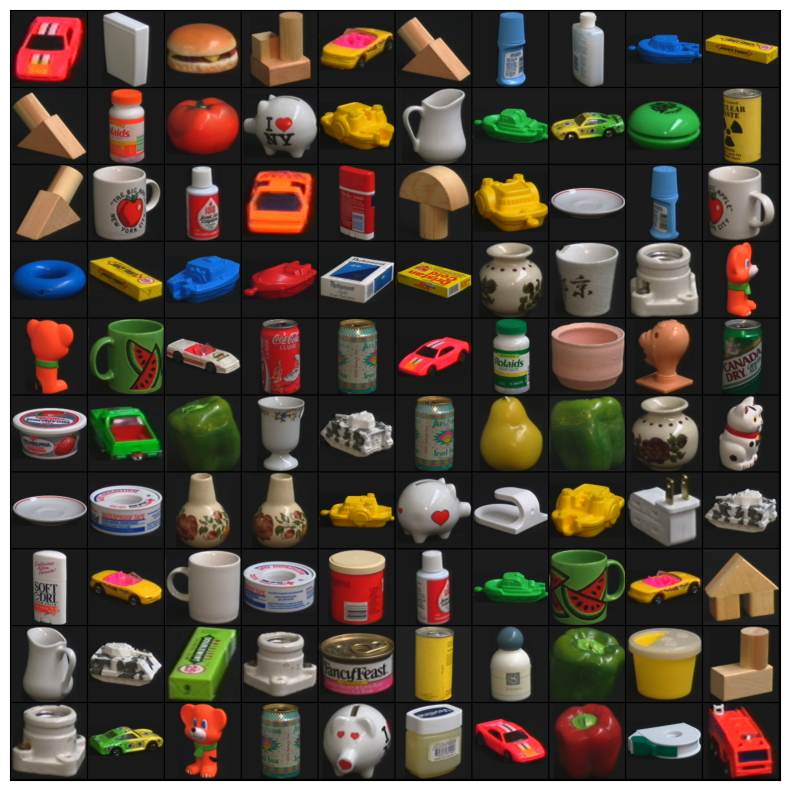

In [13]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def batch(dataload):
  for image, label in dataload:
    fig,ax =  plt.subplots(figsize = (10,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(image,nrow=10).permute(1,2,0))
    break

batch(train_data_load)



> CNN




In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [15]:
def accuracy(outputs, labels):
    _,preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [16]:

class ImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))


In [17]:
class Coil_100_Model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(input_channel, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.BatchNorm2d(256),


            nn.Flatten(),
            nn.Linear(256*1024,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,num_class)
        )

    def forward(self, xb):
        return self.network(xb)

In [18]:
model_coil100=Coil_100_Model()
model_coil100

Coil_100_Model(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=262144, out_features=1024, bias=True)
    (14): ReLU()
    (15): Linear(in_features=1024, out_features=512, bias=True)
    (16): ReLU()
    (17): Linear(in_features=512, ou



> adding cpu





In [19]:
def get_default_device():
   if torch.cuda.is_available():
        return torch.device('cuda')
   else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
   def __init__(self, dl, device):
        self.dl = dl
        self.device = device

   def __iter__(self):
       for b in self.dl:
            yield to_device(b, self.device)

   def __len__(self):
        return len(self.dl)

device = get_default_device()

In [20]:
train_data_load = DeviceDataLoader(train_data_load, device)
val_data_load = DeviceDataLoader(val_data_load, device)
test_data_load = DeviceDataLoader(test_data_load, device)
to_device(model_coil100, device);



> train



In [21]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):

    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):

        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)

    return history




In [22]:
model_coil100 = to_device(Coil_100_Model(), device)


In [23]:
evaluate(model_coil100, val_data_load)

{'val_loss': 4.614924430847168, 'val_acc': 0.011250000447034836}

In [24]:
num_epochs = 5
opt_func = torch.optim.Adam
learning_rate=0.001

In [25]:
result = fit(num_epochs, learning_rate, model_coil100, train_data_load, val_data_load, opt_func)

Epoch [0], train_loss: 2.7909, val_loss: 1.2675, val_acc: 0.6463
Epoch [1], train_loss: 0.1690, val_loss: 0.3536, val_acc: 0.9475
Epoch [2], train_loss: 0.0398, val_loss: 0.0350, val_acc: 0.9888
Epoch [3], train_loss: 0.0499, val_loss: 1.5735, val_acc: 0.7550
Epoch [4], train_loss: 0.1476, val_loss: 0.5118, val_acc: 0.8775


In [26]:
def plot_accuracies(result):
    accuracies = [x['val_acc'] for x in result]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

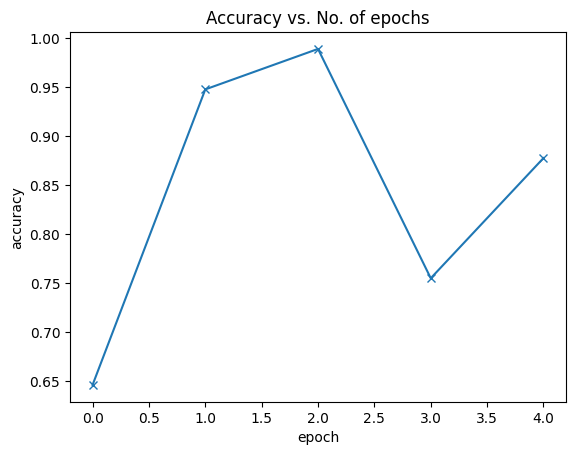

In [27]:
plot_accuracies(result)

In [28]:
def plot_losses(result):
    train_losses = [x.get('train_loss') for x in result]
    val_losses = [x['val_loss'] for x in result]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

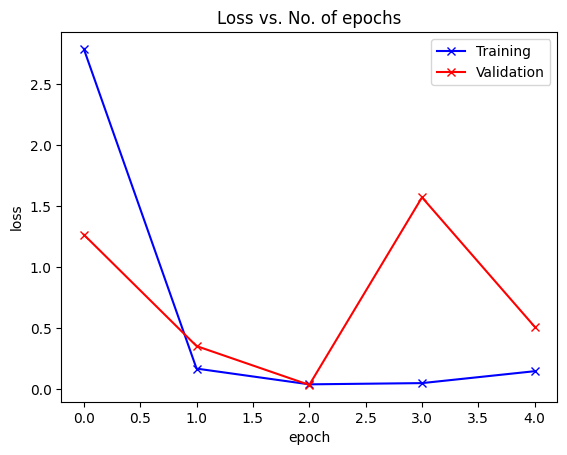

In [29]:
plot_losses(result)

In [30]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return preds[0].item()

Label: 86 , Predicted: 86


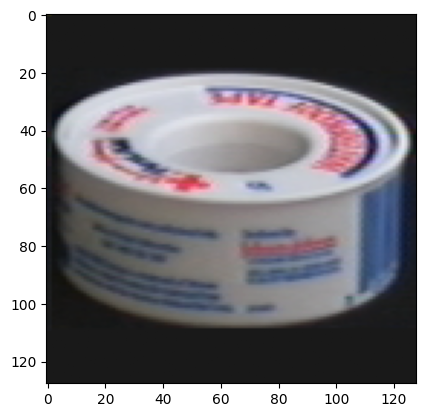

In [31]:
img, label = test_data[57]
plt.imshow(img.permute(1, 2, 0))
print('Label:', label, ', Predicted:', predict_image(img, model_coil100))

GUI

In [36]:
val_acc = [0.6463, 0.9475, 0.9888, 0.7550, 0.8775]
total_accuracy = sum(val_acc) / len(val_acc)
print(f"Total Accuracy: {total_accuracy:.4f}")  # Output: 0.8430


Total Accuracy: 0.8430
